In [43]:
import os
import datetime
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from IPython.display import Image
import warnings
warnings.filterwarnings('ignore') 
from importlib import reload
import time
import math
import scipy.stats as stats
import netCDF4 as netcdf

import cartopy
import cartopy.crs as ccrs
from cartopy import config
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from cartopy import feature as cfeature
from cartopy.feature import NaturalEarthFeature, LAND, COASTLINE, OCEAN, LAKES, BORDERS
import matplotlib.ticker as mticker

#### CalCOFI Station Data

In [4]:
# import CalCOFI stations
calcofi_stn_DF = pd.read_csv("CalCOFIStationOrder.csv")
calcofi90_stn_DF = calcofi_stn_DF[calcofi_stn_DF['Line ']==90]
lat90 = calcofi90_stn_DF['Station Dlatitude '].values
lon90 = calcofi90_stn_DF['Dlongitude '].values

In [112]:
calcofi90_stn_DF
lon90
lat90.max() # 33.49462
lat90.min() # 30
lon90.max() # -117
lon90.min() # -124

-123.99893

In [6]:
calcofi90_stn_DF # CalCOFI line 90

,Order Occ,Line,Station,Station Dlatitude,LatDeg,LatMin,LatDegMinN,Dlongitude,LonDeg,LonMin,LonDegMinW,Est Depth,StaType
17,18,90.0,120.0,30.41795,30,25.1,30 25.08,-123.99893,123,59.9,123 59.94,4141.0,ROS
18,19,90.0,110.0,30.75128,30,45.1,30 45.08,-123.33164,123,19.9,123 19.90,4017.0,ROS
19,20,90.0,100.0,31.08462,31,5.1,31 5.08,-122.66202,122,39.7,122 39.72,3997.0,ROS
20,21,90.0,90.0,31.41795,31,25.1,31 25.08,-121.99001,121,59.4,121 59.40,3879.0,ROS
21,22,90.0,80.0,31.75128,31,45.1,31 45.08,-121.31559,121,18.9,121 18.94,3694.0,ROS
22,23,90.0,70.0,32.08462,32,5.1,32 5.08,-120.63872,120,38.3,120 38.32,3806.0,ROS
23,24,90.0,60.0,32.41795,32,25.1,32 25.08,-119.95935,119,57.6,119 57.56,880.0,ROS
24,25,90.0,53.0,32.65128,32,39.1,32 39.08,-119.48228,119,28.9,119 28.94,1309.0,ROS
25,26,90.0,45.0,32.91795,32,55.1,32 55.08,-118.93551,118,56.1,118 56.13,1695.0,ROS
26,27,90.0,37.0,33.18462,33,11.1,33 11.08,-118.38708,118,23.2,118 23.22,1177.0,ROS


In [7]:
# Time conversion functions
now_utc = datetime.datetime.utcnow()

def timeIndexToDatetime(baseTime, times):
    '''
    Function to turn time index into timestamp
    :param baseTime:
    :param times:
    :return:
    '''
    newTimes = []
    for ts in times:
        newTimes.append(baseTime + datetime.timedelta(hours=ts))
    return newTimes

### NetCDF Data

In [8]:
# import netCDF data
netcdf_data = netcdf.Dataset("latest.nc4")
netcdf_data.variables.keys()

salinity = netcdf_data.variables['salinity'][:].data
times = netcdf_data.variables['time'][:].data
depth = netcdf_data.variables['depth'][:].data
lats = netcdf_data.variables['lat'][:].data
lons = netcdf_data.variables['lon'][:].data
water_temp = netcdf_data.variables['water_temp'][:].data
water_u = netcdf_data.variables['water_u'][:].data
water_v = netcdf_data.variables['water_v'][:].data

salinity.shape # (3, 1, 113, 91)
lats.shape # 113
lons.shape # 91
water_temp.shape
water_u.shape
water_v.shape

(3, 1, 113, 91)

In [35]:
salinity[0,0,:].shape # same as salinity[0][0].shape
#lats.shape

(113,)

In [137]:
netcdf_DF_1 = pd.DataFrame(data = salinity[0,0,:])
netcdf_DF = netcdf_DF_1.T
netcdf_DF.describe()
netcdf_DF

,0,1,2,3,4,5,6,7,8,9,...,103,104,105,106,107,108,109,110,111,112
0,33.460999,33.440002,33.410000,33.389000,33.384003,33.381001,33.380001,33.368000,33.357002,33.356003,...,33.124001,33.124001,33.125000,33.125999,33.129002,33.132999,33.135002,33.138000,33.139000,33.139999
1,33.465000,33.444000,33.408001,33.382000,33.371002,33.367001,33.365002,33.353001,33.343002,33.348000,...,33.127998,33.129002,33.130001,33.132000,33.132999,33.135002,33.137001,33.139000,33.141998,33.145000
2,33.469002,33.449001,33.409000,33.377998,33.360001,33.354000,33.354000,33.344002,33.334999,33.339001,...,33.127998,33.131001,33.134003,33.136002,33.138000,33.139999,33.140999,33.141998,33.144001,33.146000
3,33.471001,33.455002,33.415001,33.380001,33.354000,33.345001,33.347000,33.339001,33.332001,33.332001,...,33.125999,33.126999,33.127998,33.126999,33.130001,33.132999,33.137001,33.139999,33.143002,33.145000
4,33.472000,33.459000,33.418999,33.382000,33.348999,33.339001,33.341000,33.338001,33.334000,33.333000,...,33.140999,33.132999,33.125000,33.117001,33.113998,33.113998,33.116001,33.118999,33.125000,33.129002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86,33.491001,33.487999,33.486000,33.485001,33.484001,33.483002,33.482002,33.481003,33.480000,33.480000,...,-30000.000000,-30000.000000,-30000.000000,-30000.000000,-30000.000000,-30000.000000,-30000.000000,-30000.000000,-30000.000000,-30000.000000
87,33.493000,33.488998,33.487999,33.486000,33.485001,33.485001,33.486000,33.487000,33.488998,33.491001,...,-30000.000000,-30000.000000,-30000.000000,-30000.000000,-30000.000000,-30000.000000,-30000.000000,-30000.000000,-30000.000000,-30000.000000
88,33.516998,33.513000,33.509003,33.506001,33.502998,33.502998,33.502998,33.505001,33.507999,33.512001,...,-30000.000000,-30000.000000,-30000.000000,-30000.000000,-30000.000000,-30000.000000,-30000.000000,-30000.000000,-30000.000000,-30000.000000
89,33.537003,33.538002,33.538002,33.537003,33.535000,33.532001,33.529999,33.529999,33.528999,33.531002,...,-30000.000000,-30000.000000,-30000.000000,-30000.000000,-30000.000000,-30000.000000,-30000.000000,-30000.000000,-30000.000000,-30000.000000


In [139]:
xvalues = lons
yvalues = lats
xx, yy = np.meshgrid(xvalues, yvalues)

var = salinity[0,0,:].T
var.shape

(91, 113)

TypeError: Dimensions of C (91, 113) are incompatible with X (91) and/or Y (113); see help(pcolormesh)

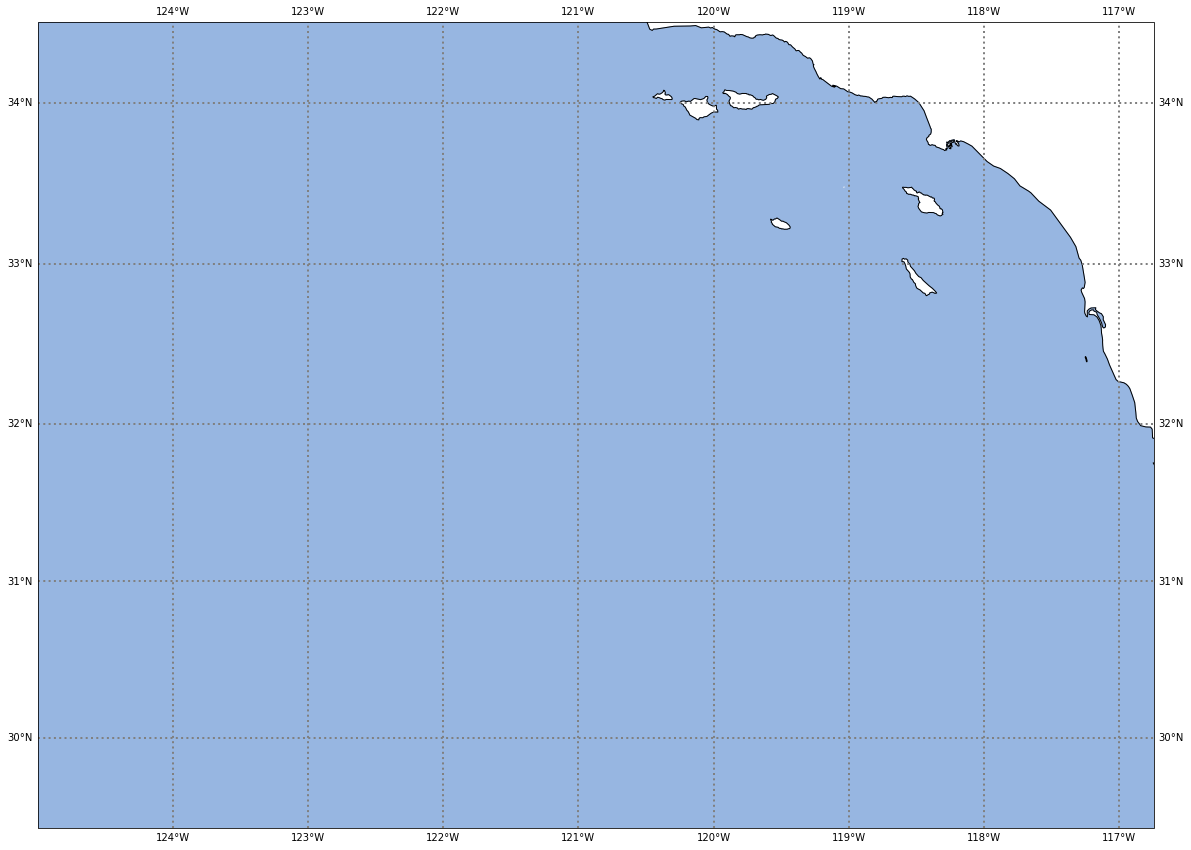

In [143]:
proj = ccrs.Mercator()
fig = plt.figure(figsize = (20, 20), frameon = True)
ax = plt.axes(projection = proj)
ax.set_extent([lon90.min()-1, lon90.max()+1, lat90.min()-1, lat90.max()+1])

ax.add_feature(OCEAN);
ax.coastlines();

# ***GRIDLINES AND LABELS BLOCK***
gl=ax.gridlines(draw_labels = True, ylocs = np.arange(0, 90, 1), xlocs = np.arange(-180, 180, 1), 
                linewidth = 2, linestyle = "dotted", color = "grey")
#gl.xlocator = mticker.FixedLocator([33,34,35])
ax.pcolormesh(xx,yy,var,transform = ccrs.PlateCarree())

In [66]:
netcdf_DF

,0,1,2,3,4,5,6,7,8,9,...,81,82,83,84,85,86,87,88,89,90
0,33.460999,33.465000,33.469002,33.471001,33.472000,33.470001,33.466000,33.460999,33.453003,33.446999,...,33.490002,33.505001,33.498001,33.507000,33.513000,33.491001,33.493000,33.516998,33.537003,33.511002
1,33.440002,33.444000,33.449001,33.455002,33.459000,33.459999,33.459999,33.455002,33.444000,33.436001,...,33.482002,33.496002,33.487999,33.496002,33.505001,33.487999,33.488998,33.513000,33.538002,33.519001
2,33.410000,33.408001,33.409000,33.415001,33.418999,33.423000,33.428001,33.427002,33.415001,33.403000,...,33.476002,33.486000,33.478001,33.488998,33.500000,33.486000,33.487999,33.509003,33.538002,33.526001
3,33.389000,33.382000,33.377998,33.380001,33.382000,33.385002,33.390999,33.391998,33.382000,33.370003,...,33.472000,33.478001,33.471001,33.484001,33.496002,33.485001,33.486000,33.506001,33.537003,33.533001
4,33.384003,33.371002,33.360001,33.354000,33.348999,33.346001,33.347000,33.347000,33.343002,33.333000,...,33.470001,33.472000,33.468002,33.482002,33.493000,33.484001,33.485001,33.502998,33.535000,33.540001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108,33.132999,33.135002,33.139999,33.132999,33.113998,33.110001,33.120003,33.139000,33.179001,33.242001,...,-30000.000000,-30000.000000,-30000.000000,-30000.000000,-30000.000000,-30000.000000,-30000.000000,-30000.000000,-30000.000000,-30000.000000
109,33.135002,33.137001,33.140999,33.137001,33.116001,33.107002,33.110001,33.130001,33.153999,33.192001,...,-30000.000000,-30000.000000,-30000.000000,-30000.000000,-30000.000000,-30000.000000,-30000.000000,-30000.000000,-30000.000000,-30000.000000
110,33.138000,33.139000,33.141998,33.139999,33.118999,33.104000,33.103001,33.120003,33.135002,33.154999,...,-30000.000000,-30000.000000,-30000.000000,-30000.000000,-30000.000000,-30000.000000,-30000.000000,-30000.000000,-30000.000000,-30000.000000
111,33.139000,33.141998,33.144001,33.143002,33.125000,33.106003,33.101002,33.105000,33.129002,33.149002,...,-30000.000000,-30000.000000,-30000.000000,-30000.000000,-30000.000000,-30000.000000,-30000.000000,-30000.000000,-30000.000000,-30000.000000
